# IMPORTING LIBRARIES

In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

#FETCHING DATASET

In [5]:
dataset = keras.datasets.fashion_mnist

In [7]:
train,test =dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
x_train, y_train = train
x_test, y_test = test

# PREPPING DATA

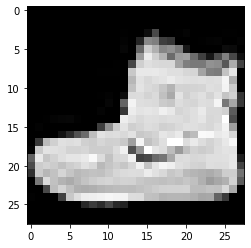

In [14]:
plt.imshow(x_train[0], cmap='gray')

In [16]:
x_train.shape

(60000, 28, 28)

In [18]:
x_val,x_train_final= x_train[:5000]/255.0,x_train[5000:]/255.0
y_val, y_train_final = y_train[:5000], y_train[5000:]

# BUILDING AND TRAINING MODEL

In [26]:
model = keras.models.Sequential()

In [27]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [28]:
model.add(keras.layers.Dense(300, activation='relu'))

In [29]:
model.add(keras.layers.Dense(100,activation='relu'))

In [30]:
model.add(keras.layers.Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [37]:
clf = model.fit(x_train_final,y_train_final,validation_data=(x_val,y_val),epochs=30)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1238 - accuracy: 0.9521 - val_loss: 0.4378 - val_accuracy: 0.8990
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9527 - val_loss: 0.4728 - val_accuracy: 0.8912
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9560 - val_loss: 0.4361 - val_accuracy: 0.8968
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1173 - accuracy: 0.9547 - val_loss: 0.4369 - val_accuracy: 0.9000
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1130 - accuracy: 0.9557 - val_loss: 0.4547 - val_accuracy: 0.8988
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9578 - val_loss: 0.5330 - val_accuracy: 0.8866
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1122 - accuracy: 0.9570 - val_loss: 0.5004 - val_accuracy:

# CHECKING ACCURACY

In [38]:
test = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 164.3789 - accuracy: 0.8672


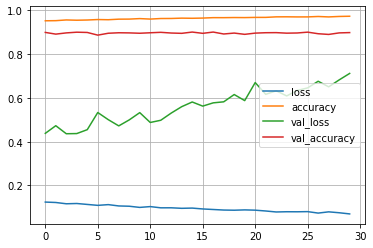

In [40]:
pd.DataFrame(clf.history).plot()
plt.grid(True)

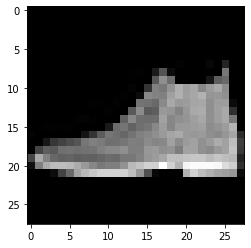

In [44]:
x=x_test[:1][0]
plt.imshow(x,cmap='gray')

In [51]:
x.shape

(28, 28)

In [52]:
pred= model.predict(x_test[:1])
pred 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [55]:
y=y_test[:1]
y

array([9], dtype=uint8)